## Exercise 5.1
the distribution of heights is roughly normal with parameters mean= 178 cm and std= 7.7 cm for men, and mean= 163 cm and std =7.3 cm for women. To Join blue man group. you have to be male and between 5′10″ and 6′1″ tall. What percentage of the US male population is in this range

In [4]:
import nsfg
import numpy as np
import thinkstats2
import thinkplot
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
#per statement, It is a normal distribution
male_mean_ht =178
sigma =7.7
#ft/inch to cm
lower_male_ht=(5 * 30.48) + (10 * 2.54)
higher_male_ht=(6 * 30.48 ) + (1 * 2.54)
distro= scipy.stats.norm(loc=male_mean_ht, scale=sigma)

In [5]:
lowend = distro.cdf(lower_male_ht)
highend = distro.cdf(higher_male_ht)
print (f'The Percentage of US male population within range of 5′10″ and 6′1″ is {round(((highend-lowend)*100),2)}%')

The Percentage of US male population within range of 5′10″ and 6′1″ is 34.27%


## Exercise 5.2
let’s see how different the world would be if the distribution of human height were Pareto. With the parameters Xmin = 1m and alpha=1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

In [6]:
xmin =1
alpha =1.7
distro = scipy.stats.pareto(b=alpha, scale=xmin)

In [7]:
print (f'The mean height in pareto distro is {round(distro.mean(),2)}m')
print(f'The percentage of human shorter than distro mean is {round((distro.cdf(2.43)),3)*100}%')

The mean height in pareto distro is 2.43m
The percentage of human shorter than distro mean is 77.9%


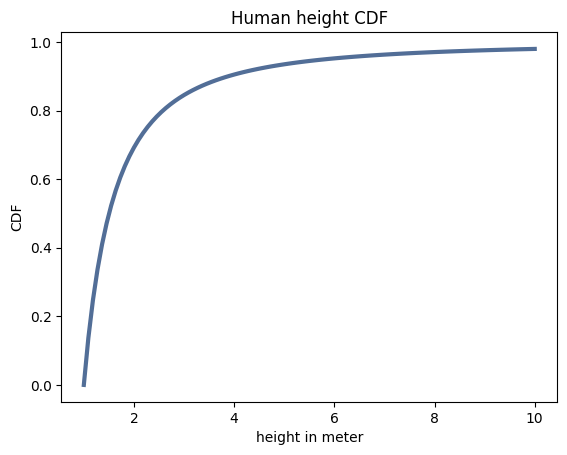

In [8]:
#cdf
xs, ps = thinkstats2.RenderParetoCdf(xmin,alpha,0,10.0,n=100)
thinkplot.Plot(xs,ps)
thinkplot.Config(title='Human height CDF',xlabel='height in meter',ylabel='CDF',loc='lower right')

### How many people taller than 1 KM (1000 meter) out of 7 billion people

In [9]:
print('Count of people taller than 1KM is',round((1-distro.cdf(1000))*7e9))

Count of people taller than 1KM is 55603


### How tall is the tallest person
expect only one person is the tallest

In [10]:
print('Tallest height is', round(distro.ppf(1-1/7e9),2),'meter')

Tallest height is 618349.61 meter


## Exercise 6.1
The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is, The InterpolateSample generates a pseudo-sample, Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. 

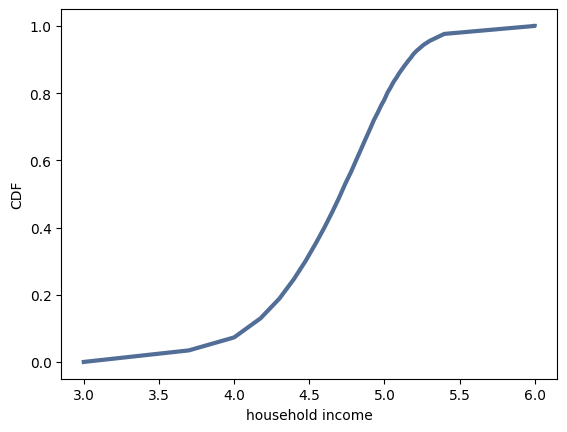

Thinkstats median: 4.709494298224238
Thinkstats median converted back to dollars: $51,226.45
Thinkstats mean: 4.657585735892018
Thinkstats mean converted back to dollars: $45,455.43
Thinkstats skewness: -0.6413543665662108
Thinkstats Pearson's skewness: -0.3379202513383129


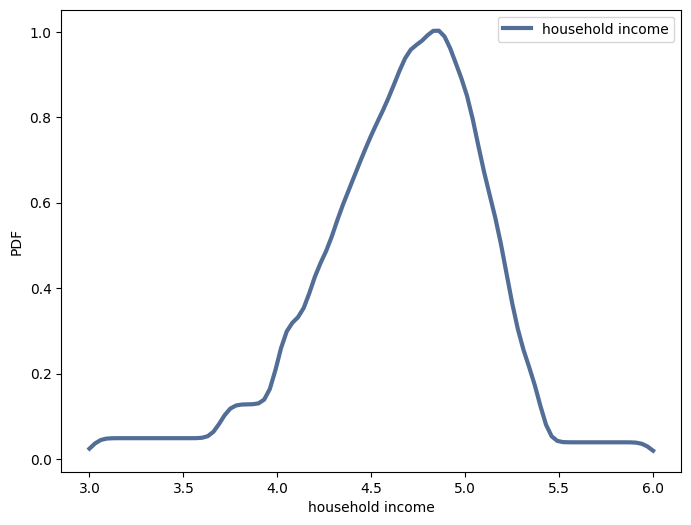

The fraction of households below the mean is: approximately 45.06%.  This is calculated by showing the following:
The difference between the cdf Value at this percentage and the mean is: -1.2811303493620585e-06


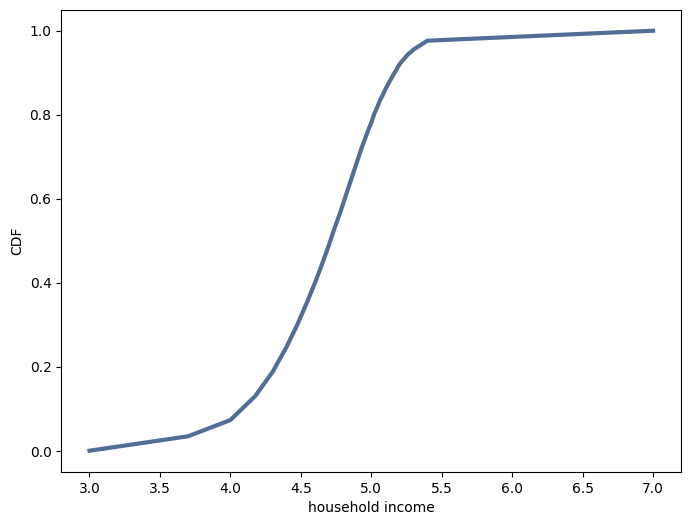

Thinkstats mean: 4.66947144364488
Thinkstats mean converted back to dollars: $46,716.62
If we changed the upper bound, to say 7 or $10 million, the difference in mean in dollars is: $1,261.20
The difference in skewness: 0.721872902278579
The difference in Pearson's skewness: 0.0964735718992728


<Figure size 800x600 with 0 Axes>

In [12]:

from __future__ import print_function

import numpy as np

import hinc
import thinkplot
import thinkstats2


def InterpolateSample(df, log_upper=6.0):

    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


def Median(xs):
    cdf = thinkstats2.MakeCdfFromList(xs)
    return cdf.Value(0.5)


def PearsonMedianSkewness(xs):
    pass
    # median = Median(xs)
    # mean =


def main():
    df = hinc.ReadData()
    log_sample = InterpolateSample(df, log_upper=6.0)

    log_cdf = thinkstats2.Cdf(log_sample)

    thinkplot.Cdf(log_cdf)
    thinkplot.Show(xlabel='household income',
                   ylabel='CDF')

    cdf = thinkstats2.MakeCdfFromList(log_cdf)

    tsmedian = thinkstats2.Median(log_sample)
    print("Thinkstats median:", tsmedian)
    print("Thinkstats median converted back to dollars:", "${:,.2f}".format(10 ** tsmedian))

    tsmean = thinkstats2.Mean(log_sample)
    print("Thinkstats mean:", tsmean)

    print("Thinkstats mean converted back to dollars:", "${:,.2f}".format(10 ** tsmean))

    tsskewness = thinkstats2.Skewness(log_sample)
    print("Thinkstats skewness:", tsskewness)

    tsPearskewness = thinkstats2.PearsonMedianSkewness(log_sample)
    print("Thinkstats Pearson's skewness:", tsPearskewness)

    pdf = thinkstats2.EstimatedPdf(log_sample)
    thinkplot.Pdf(pdf, label='household income')
    thinkplot.Show(xlabel='household income', ylabel='PDF')

    print("The fraction of households below the mean is: approximately 45.06%.  This is calculated by showing the "
          "following:")
    print("The difference between the cdf Value at this percentage and the mean is:", cdf.Value(0.450603472) - tsmean)

    log_sample2 = InterpolateSample(df, log_upper=7.0)
    log_cdf2 = thinkstats2.Cdf(log_sample2)

    thinkplot.Cdf(log_cdf2)
    thinkplot.Show(xlabel='household income',
                   ylabel='CDF')

    tsmean2 = thinkstats2.Mean(log_sample2)
    print("Thinkstats mean:", tsmean2)

    print("Thinkstats mean converted back to dollars:", "${:,.2f}".format(10 ** tsmean2))

    tsskewness2 = thinkstats2.Skewness(log_sample2)

    tsPearskewness2 = thinkstats2.PearsonMedianSkewness(log_sample2)

    print("If we changed the upper bound, to say 7 or $10 million, the difference in mean in dollars is:",
          "${:,.2f}".format(10 ** tsmean2 - 10 ** tsmean))

    print("The difference in skewness:", tsskewness2 - tsskewness)

    print("The difference in Pearson's skewness:", tsPearskewness2 - tsPearskewness)


if __name__ == "__main__":
    main()


### conclusion:
My conclusions based on these figures are:

1) The Pareto model might be a reasonable choice for the top 10-20% of incomes.
2) The lognormal model captures the shape of the distribution better, with some deviation in the left tail.  With different choices for sigma, you could match the upper or lower tail, but not both at the same time.
 
In summary I would say that neither model captures the whole distribution, so you might have to 

1) look for another analytic model, 
2) choose one that captures the part of the distribution that is most relevent, or 
3) avoid using an analytic model altogether.